# Political Event Classification Attributes & Types POLECAT

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("POLECAT.csv").convert_dtypes()

### Rows and columns 

In [3]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 31


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

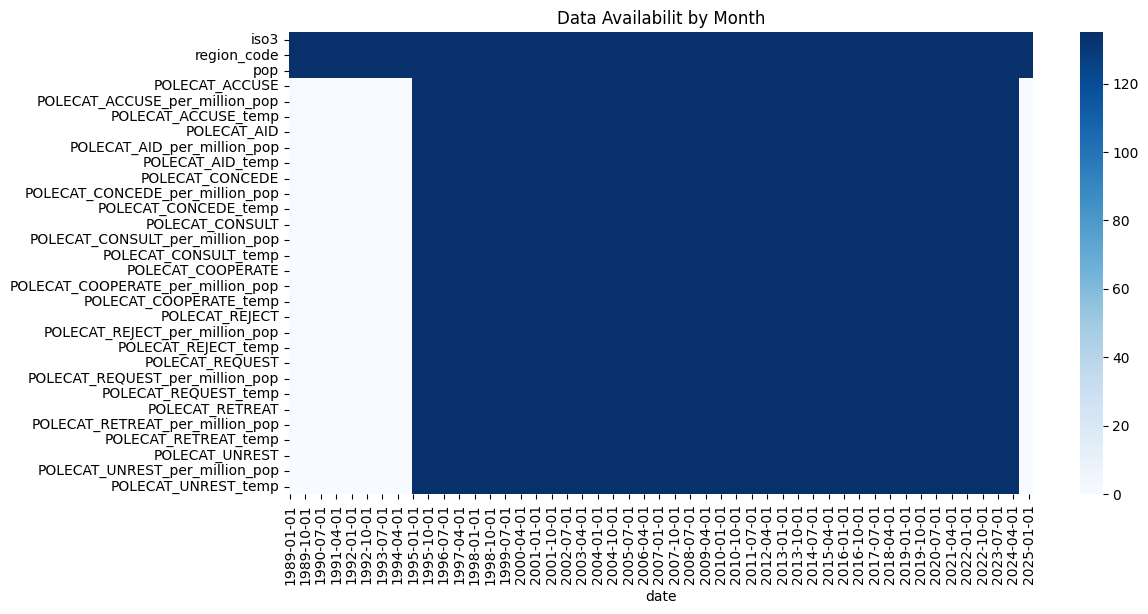

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('2001-01-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [6]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
POLECAT_ACCUSE,<NA>,<NA>,<NA>,<NA>,<NA>
POLECAT_ACCUSE_per_million_pop,<NA>,<NA>,<NA>,<NA>,<NA>
POLECAT_ACCUSE_temp,<NA>,<NA>,<NA>,<NA>,<NA>
POLECAT_AID,<NA>,<NA>,<NA>,<NA>,<NA>
POLECAT_AID_per_million_pop,<NA>,<NA>,<NA>,<NA>,<NA>
POLECAT_AID_temp,<NA>,<NA>,<NA>,<NA>,<NA>
POLECAT_CONCEDE,<NA>,<NA>,<NA>,<NA>,<NA>


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   iso3                               58725 non-null  string 
 1   region_code                        58725 non-null  string 
 2   pop                                58713 non-null  Float64
 3   POLECAT_ACCUSE                     47925 non-null  Float64
 4   POLECAT_ACCUSE_per_million_pop     47925 non-null  Float64
 5   POLECAT_ACCUSE_temp                47925 non-null  Float64
 6   POLECAT_AID                        47925 non-null  Float64
 7   POLECAT_AID_per_million_pop        47925 non-null  Float64
 8   POLECAT_AID_temp                   47925 non-null  Float64
 9   POLECAT_CONCEDE                    47925 non-null  Float64
 10  POLECAT_CONCEDE_per_million_pop    47925 non-null  Float64
 11  POLECAT_CONCEDE_temp               47925 non-

### Descriptive statistics of categorical columns

In [8]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
POLECAT_ACCUSE,47925.0,15.83921,43.827414,0.0,0.0,2.917067,13.2881,857.123255
POLECAT_ACCUSE_per_million_pop,47925.0,1.013435,2.772397,0.0,0.0,0.238143,0.871899,66.41354
POLECAT_ACCUSE_temp,47925.0,1.077383,5.097639,0.0,0.0,0.238259,0.873405,832.471941
POLECAT_AID,47925.0,5.871897,16.968787,0.0,0.0,0.65,4.782795,1044.0
POLECAT_AID_per_million_pop,47925.0,0.375623,1.433885,0.0,0.0,0.03884,0.270244,93.724531
POLECAT_AID_temp,47925.0,0.435457,4.163482,0.0,0.0,0.038928,0.270716,509.372453
POLECAT_CONCEDE,47925.0,1.090746,6.669434,0.0,0.0,0.0,0.3,217.608166
POLECAT_CONCEDE_per_million_pop,47925.0,0.030121,0.129826,0.0,0.0,0.0,0.014163,5.414192
POLECAT_CONCEDE_temp,47925.0,0.040698,1.41257,0.0,0.0,0.0,0.014238,305.623472


### Deatils of missing values in the features

In [10]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
POLECAT_ACCUSE_per_million_pop,10800,18.39
POLECAT_ACCUSE,10800,18.39
POLECAT_ACCUSE_temp,10800,18.39
POLECAT_AID_temp,10800,18.39
POLECAT_AID_per_million_pop,10800,18.39
POLECAT_AID,10800,18.39
POLECAT_CONCEDE_per_million_pop,10800,18.39
POLECAT_CONCEDE_temp,10800,18.39
POLECAT_CONSULT,10800,18.39
POLECAT_CONCEDE,10800,18.39


In [11]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [12]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

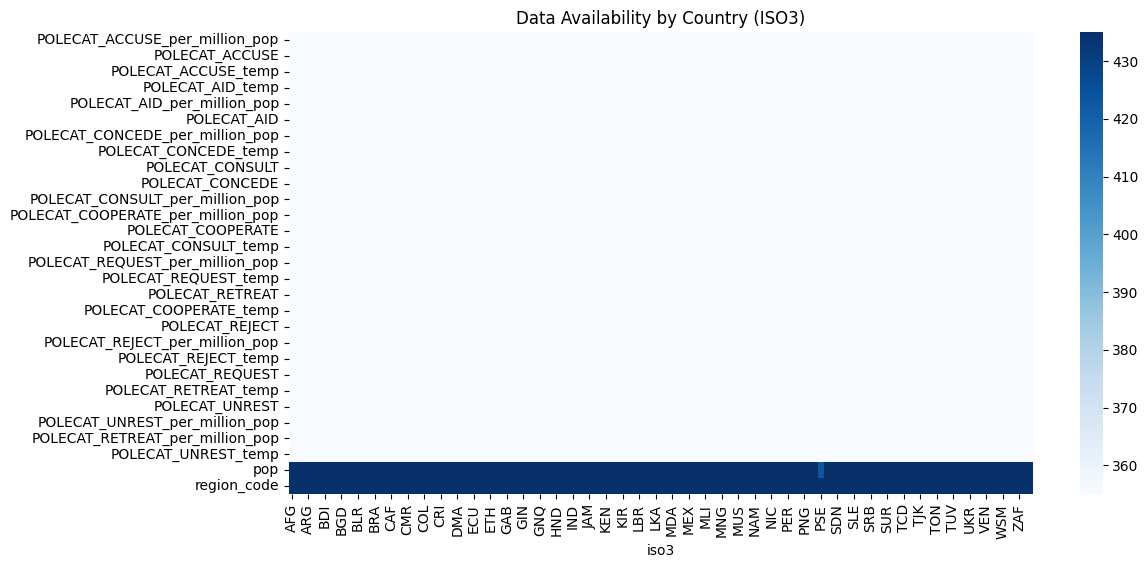

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

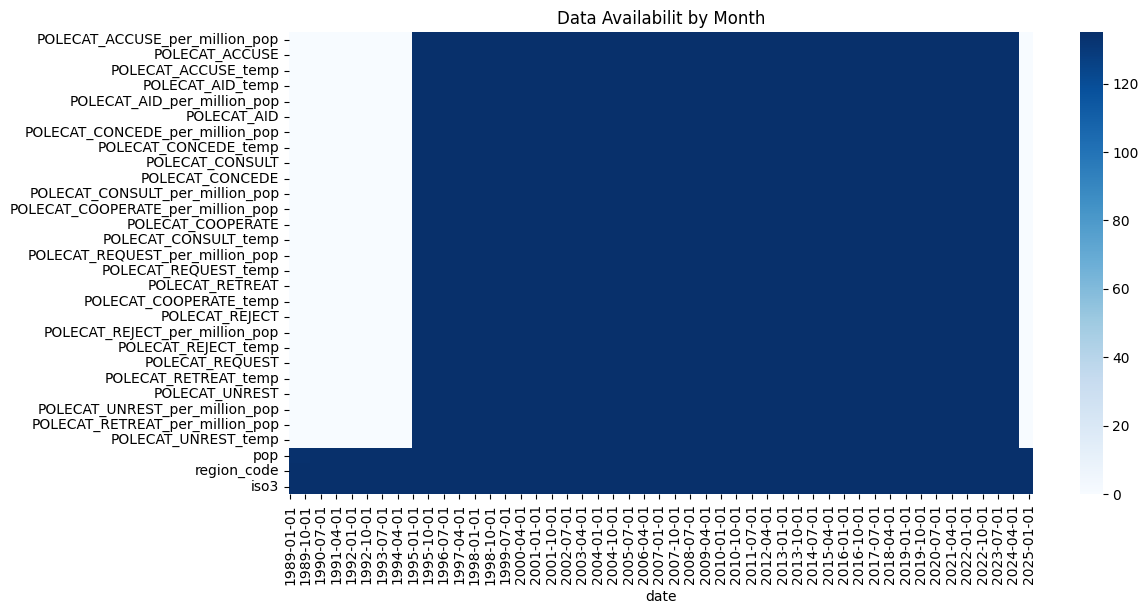

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [15]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

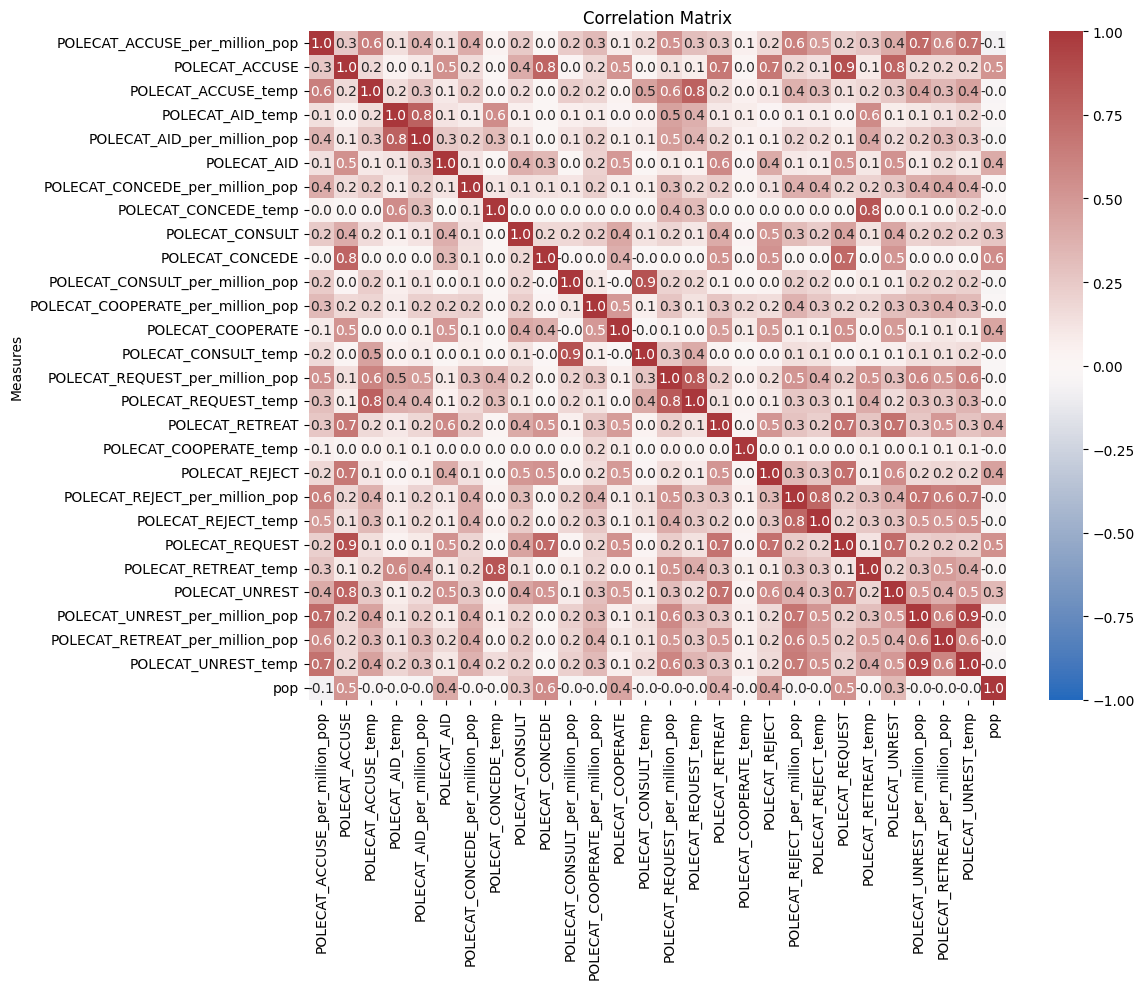

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [17]:
numeric_df.shape

(47925, 28)

### Principal Components Analysis of the features

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 8
Column names for PCA components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8']


In [19]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [20]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

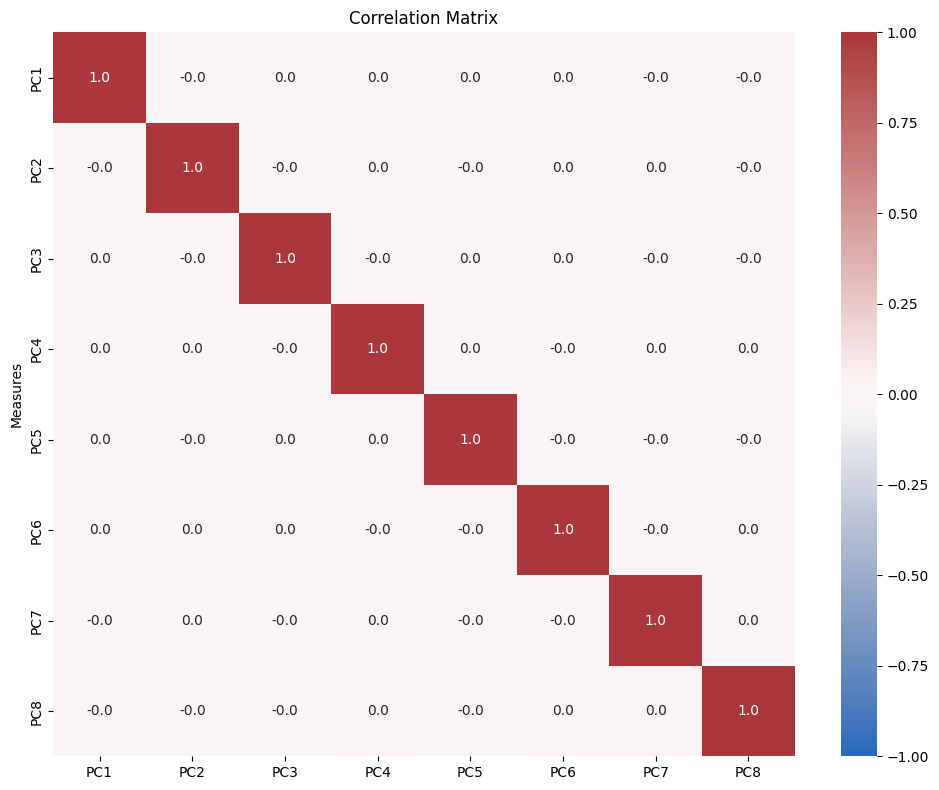

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

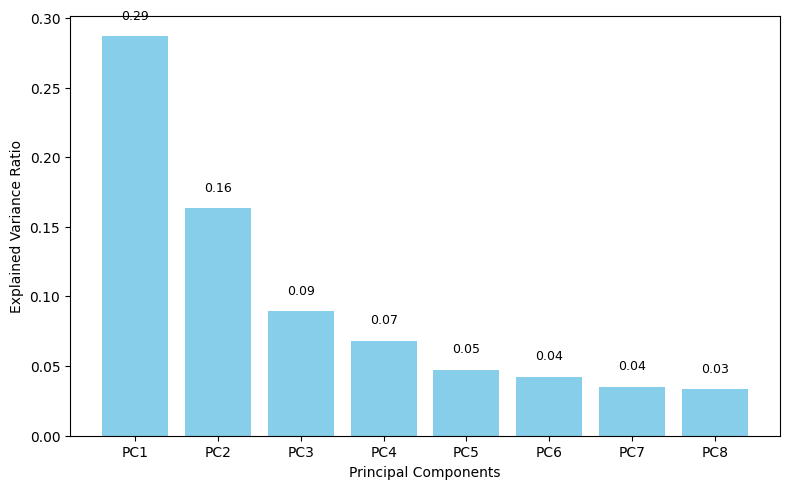

In [22]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 3: 0.5394


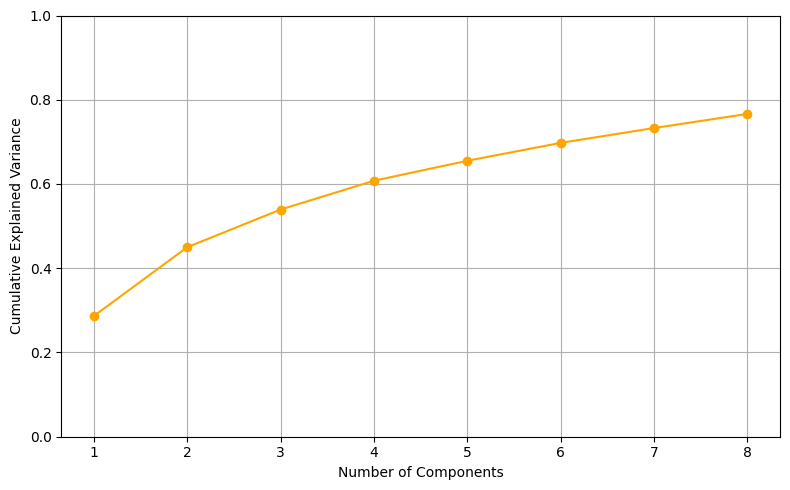

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 3 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

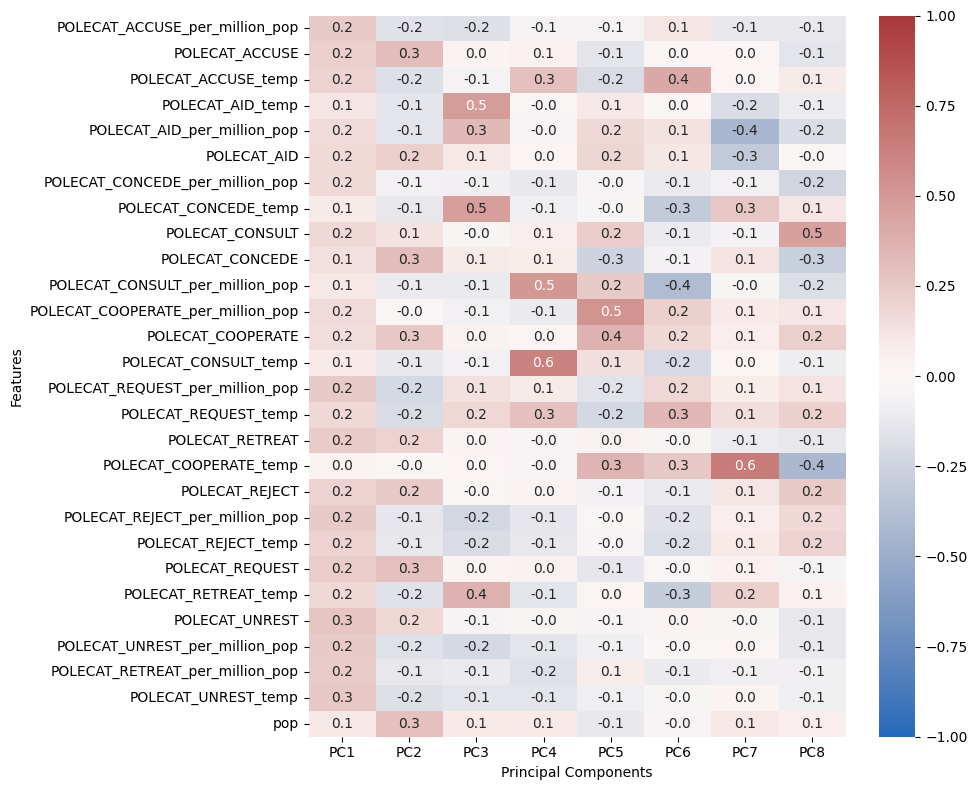

In [27]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [28]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                    PC1   PC2   PC3   PC4   PC5   PC6   PC7  \
POLECAT_ACCUSE_per_million_pop     0.24 -0.16 -0.17 -0.06 -0.06  0.12 -0.13   
POLECAT_ACCUSE                     0.22  0.31  0.04  0.05 -0.15  0.01  0.01   
POLECAT_ACCUSE_temp                0.20 -0.18 -0.06  0.29 -0.20  0.41  0.01   
POLECAT_AID_temp                   0.11 -0.14  0.47 -0.03  0.10  0.01 -0.20   
POLECAT_AID_per_million_pop        0.16 -0.14  0.32 -0.04  0.17  0.13 -0.44   
POLECAT_AID                        0.17  0.22  0.10  0.01  0.19  0.11 -0.31   
POLECAT_CONCEDE_per_million_pop    0.16 -0.08 -0.08 -0.12 -0.03 -0.11 -0.08   
POLECAT_CONCEDE_temp               0.08 -0.13  0.47 -0.09 -0.05 -0.30  0.26   
POLECAT_CONSULT                    0.18  0.13 -0.04  0.07  0.23 -0.11 -0.07   
POLECAT_CONCEDE                    0.14  0.31  0.08  0.08 -0.26 -0.06  0.12   
POLECAT_CONSULT_per_million_pop    0.10 -0.11 -0.11  0.50  0.25 -0.40 -0.04   
POLECAT_COOPERATE_per_millio

## Physical interpretation

### pc 1- General Political Intensity,PC1 captures a generalized frequency and intensity of political actions like accusing, requesting, rejecting, and retreating.

### PC2- Cooperative vs. Adversarial Tone, PC2 seems to contrast statements/actions made at a national or structural level (positive values) with temporal or short-term spikes (negative values). There's a thematic grouping of direct political dialogue (accuse, reject, request, concede, cooperate) suggesting this dimension captures the tone or consistency of political discourse.

### PC3- Aid and Concession Dynamics, This component isolates collaborative or cooperative political behaviors, especially those tied to aid and concessions, with a temporal aspect